In [ ]:
!pip install praw pandas textblob boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 7.1 MB/s eta 0:00:00


In [ ]:

# Install required packages (run these lines in Colab or terminal)
!pip install praw pandas textblob

# --- Import libraries ---
import praw
import pandas as pd
from textblob import TextBlob
import re

# --- ENTER YOUR REDDIT API CREDENTIALS ---
client_id = "KTUyPqMd0dEJfXdlvKfaKQ"           # Copy from Reddit app page
client_secret = "5-kwS1AIRW0U1xvNI6lv0tMZUDGQ_Q"   # Copy from Reddit app page ('secret' field)
user_agent = "social-media-analytics-pipeline by Diya"  # Or any custom string

# --- Set up Reddit instance ---
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent
)

# --- Function to clean the text ---
def clean_text(text):
    text = re.sub(r"http\S+", "", text)                 # remove URLs
    text = re.sub(r"[^A-Za-z\s]", "", text)             # remove non-letters
    return text.strip().lower()

# --- Function for sentiment analysis ---
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# --- Fetch posts from a subreddit (change subreddit_name as needed) ---
def fetch_posts(subreddit_name, limit=50):
    subreddit = reddit.subreddit(subreddit_name)
    posts = []
    for post in subreddit.hot(limit=limit):
        content = (post.title or "") + " " + (post.selftext or "")
        clean = clean_text(content)
        sentiment = get_sentiment(clean)
        posts.append({
            "id": post.id,
            "title": post.title,
            "clean_text": clean,
            "sentiment_score": sentiment,
            "sentiment_label": "Positive" if sentiment > 0.1 else ("Negative" if sentiment < -0.1 else "Neutral"),
            "created_utc": post.created_utc,
            "score": post.score,
            "num_comments": post.num_comments,
            "url": post.url
        })
    return pd.DataFrame(posts)

# --- Example usage: Fetch 20 posts from 'technology' subreddit ---
df = fetch_posts('technology', limit=20)
print(df.head())

# --- Save as CSV ---
df.to_csv("reddit_technology_posts.csv", index=False)
print("Saved CSV: reddit_technology_posts.csv")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



        id                                              title  \
0  1mpbs7c  Tesla Diner Drops Most Menu Options And Cuts H...   
1  1mpop8k  Companies Are Pouring Billions Into A.I. It Ha...   
2  1mpmdmf  Microsoft's Windows lead says the next version...   
3  1mpne40  Trump orders cull of regulations governing com...   
4  1mp5wi9  UK porn site traffic plunges as age verificati...   

                                          clean_text  sentiment_score  \
0  tesla diner drops most menu options and cuts h...             0.60   
1  companies are pouring billions into ai it has ...             0.00   
2  microsofts windows lead says the next version ...             0.25   
3  trump orders cull of regulations governing com...             0.00   
4  uk porn site traffic plunges as age verificati...             0.00   

  sentiment_label   created_utc  score  num_comments  \
0        Positive  1.755108e+09  12582           596   
1         Neutral  1.755140e+09    978           108   
2 

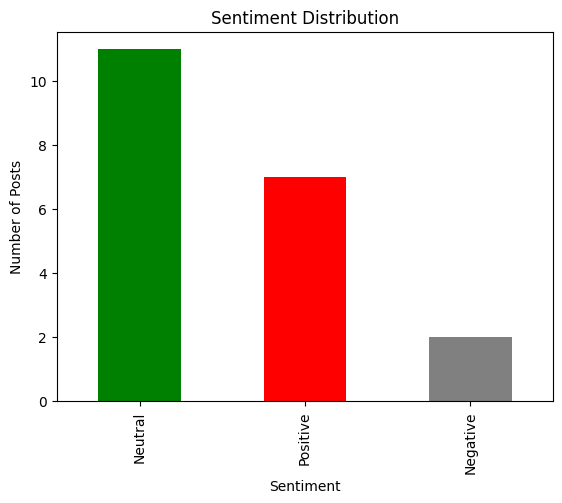

In [ ]:
import matplotlib.pyplot as plt
df['sentiment_label'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.show()

In [ ]:
def fetch_posts_and_comments(subreddit_name, post_limit=20, comment_limit=10):
    subreddit = reddit.subreddit(subreddit_name)
    data = []
    for post in subreddit.hot(limit=post_limit):
        content = (post.title or "") + " " + (post.selftext or "")
        clean = clean_text(content)
        sentiment = get_sentiment(clean)
        comments = []
        post.comments.replace_more(limit=0)
        for c in post.comments.list()[:comment_limit]:
            c_text = clean_text(c.body)
            c_sentiment = get_sentiment(c_text)
            comments.append({
                'comment_id': c.id,
                'comment_body': c.body,
                'comment_clean_text': c_text,
                'comment_sentiment': c_sentiment
            })
        data.append({
            "id": post.id,
            "title": post.title,
            "clean_text": clean,
            "sentiment_score": sentiment,
            "sentiment_label": "Positive" if sentiment > 0.1 else ("Negative" if sentiment < -0.1 else "Neutral"),
            "created_utc": post.created_utc,
            "score": post.score,
            "num_comments": post.num_comments,
            "url": post.url,
            "comments": comments
        })
    return data

# Usage
post_data = fetch_posts_and_comments('technology', post_limit=5, comment_limit=5)
import json
with open('reddit_posts_and_comments.json', 'w') as f:
    json.dump(post_data, f, indent=2)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

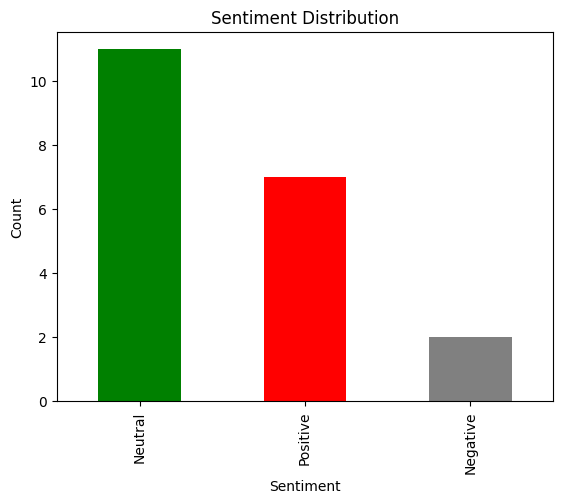

In [ ]:
import matplotlib.pyplot as plt

df['sentiment_label'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()